In [15]:
!pip install catboost
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
df = pd.read_csv(r'drive/MyDrive/Skripsi/india.csv')

In [18]:
#Dropping unnecessary columns
cols_to_drop = ['Station_Code', 'Locations', 'State', 'Temp', 'Year']
df = df.drop(cols_to_drop, axis=1)
df.head()

,DO,pH,EC,BOD,Nitrate,FecalC,TotalC,Class
0,6.7,7.5,203.0,6.940049,0.1,11.0,27.0,4
1,5.7,7.2,189.0,2.000000,0.2,4953.0,8391.0,4
2,6.3,6.9,179.0,1.700000,0.1,3243.0,5330.0,4
3,5.8,6.9,64.0,3.800000,0.5,5382.0,8443.0,4
4,5.8,7.3,83.0,1.900000,0.4,3428.0,5500.0,4


,DO,pH,EC,BOD,Nitrate,FecalC,TotalC,Class
0,6.7,7.5,203.0,6.940049,0.1,11.0,27.0,4
1,5.7,7.2,189.0,2.000000,0.2,4953.0,8391.0,4
2,6.3,6.9,179.0,1.700000,0.1,3243.0,5330.0,4
3,5.8,6.9,64.0,3.800000,0.5,5382.0,8443.0,4
4,5.8,7.3,83.0,1.900000,0.4,3428.0,5500.0,4


In [19]:
#Seperating X & y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [20]:
#Splitting test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
#Applying data standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
#Apply SMOTE and create new X_train & y_train
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [23]:
#Empty result dataframe
res = pd.DataFrame(index=['precision','recall','f1-score','accuracy'])

In [24]:
#Result Function
def result(clf, Classifier_Name, X_train, X_test):
  #Model Fitting
  clf.fit(X_train, y_train)
  
  #Showing performance result
  y_pred=clf.predict(X_test)
  from sklearn.metrics import classification_report
  clf_res = classification_report(y_test, y_pred, output_dict=True)

  #Append classifier result to result DataFrame
  res[str(Classifier_Name)] = [clf_res['weighted avg']['precision'],
                               clf_res['weighted avg']['recall'], 
                               clf_res['weighted avg']['f1-score'], 
                               clf_res['accuracy']]
  display(res)

  #Creating confusion matrix illustration
  from sklearn.metrics import ConfusionMatrixDisplay
  disp = ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, xticks_rotation="vertical", 
    display_labels=['Unsuitable', 'Very Poor', 'Poor', 'Good', 'Excellent'])
  disp.ax_.set_title("Confusion Matrix for " + str(Classifier_Name) + " Classifier")

,Decision Tree
precision,0.994308
recall,0.993311
f1-score,0.993430
accuracy,0.993311


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7,"(0, 1, 2, 3, 4, 5, 6)","[0.993891797556719, 0.9973821989528796, 0.9912...",0.994066,"(0, 1, 2, 3, 4, 5, 6)",0.002873,0.002235,0.001117
6,"(0, 1, 3, 4, 5, 6)","[0.9912739965095986, 0.9965095986038395, 0.992...",0.994939,"(0, 1, 3, 4, 5, 6)",0.003431,0.00267,0.001335
5,"(1, 3, 4, 5, 6)","[0.9904013961605584, 0.9956369982547993, 0.997...",0.995462,"(1, 3, 4, 5, 6)",0.003357,0.002612,0.001306
4,"(1, 3, 4, 5)","[0.9904013961605584, 0.9965095986038395, 0.995...",0.995637,"(1, 3, 4, 5)",0.003547,0.002759,0.00138
3,"(1, 3, 5)","[0.987783595113438, 0.9982547993019197, 0.9956...",0.995986,"(1, 3, 5)",0.005567,0.004331,0.002166
2,"(1, 3)","[0.7931937172774869, 0.8926701570680629, 0.857...",0.860209,"(1, 3)",0.045835,0.035661,0.017831
1,"(1,)","[0.5636998254799301, 0.675392670157068, 0.6553...",0.646771,"(1,)",0.054324,0.042266,0.021133


('1', '3', '5')

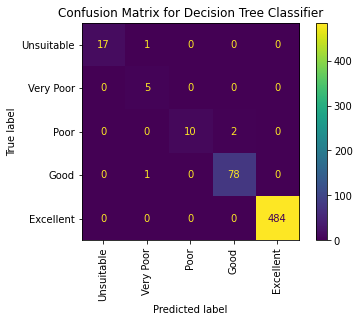

,Decision Tree
precision,0.994308
recall,0.993311
f1-score,0.993430
accuracy,0.993311


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7,"(0, 1, 2, 3, 4, 5, 6)","[0.993891797556719, 0.9973821989528796, 0.9912...",0.994066,"(0, 1, 2, 3, 4, 5, 6)",0.002873,0.002235,0.001117
6,"(0, 1, 3, 4, 5, 6)","[0.9912739965095986, 0.9965095986038395, 0.992...",0.994939,"(0, 1, 3, 4, 5, 6)",0.003431,0.00267,0.001335
5,"(1, 3, 4, 5, 6)","[0.9904013961605584, 0.9956369982547993, 0.997...",0.995462,"(1, 3, 4, 5, 6)",0.003357,0.002612,0.001306
4,"(1, 3, 4, 5)","[0.9904013961605584, 0.9965095986038395, 0.995...",0.995637,"(1, 3, 4, 5)",0.003547,0.002759,0.00138
3,"(1, 3, 5)","[0.987783595113438, 0.9982547993019197, 0.9956...",0.995986,"(1, 3, 5)",0.005567,0.004331,0.002166
2,"(1, 3)","[0.7931937172774869, 0.8926701570680629, 0.857...",0.860209,"(1, 3)",0.045835,0.035661,0.017831
1,"(1,)","[0.5636998254799301, 0.675392670157068, 0.6553...",0.646771,"(1,)",0.054324,0.042266,0.021133


('1', '3', '5')

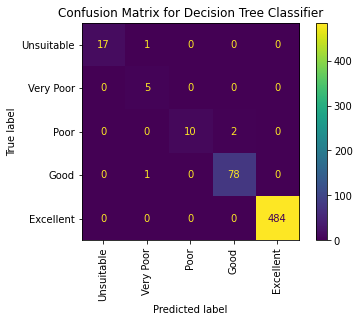

In [25]:
#Using Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#Wrapper Feature Selection
#from sklearn.feature_selection import SequentialFeatureSelector
#sfs_dt = SequentialFeatureSelector(dt_clf, direction='backward')
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector
sfs_dt = SequentialFeatureSelector(dt_clf, forward=False, k_features="best")
sfs_dt.fit(X_train, y_train)
X_train_dt = sfs_dt.transform(X_train)
X_test_dt = sfs_dt.transform(X_test)

#Display Result
result(dt_clf, "Decision Tree", X_train_dt, X_test_dt)

#Creating selected features dataframe with corresponding column names
display(pd.DataFrame.from_dict(sfs_dt.get_metric_dict()).T)
display(sfs_dt.k_feature_names_)

,Decision Tree,Random Forest
precision,0.994308,0.986082
recall,0.993311,0.984950
f1-score,0.993430,0.985197
accuracy,0.993311,0.984950


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7,"(0, 1, 2, 3, 4, 5, 6)","[0.9930191972076788, 0.9991273996509599, 0.998...",0.997382,"(0, 1, 2, 3, 4, 5, 6)",0.002837,0.002208,0.001104
6,"(0, 1, 2, 3, 4, 5)","[0.9965095986038395, 1.0, 0.9973821989528796, ...",0.998429,"(0, 1, 2, 3, 4, 5)",0.001648,0.001282,0.000641
5,"(1, 2, 3, 4, 5)","[0.9930191972076788, 1.0, 0.9991273996509599, ...",0.997731,"(1, 2, 3, 4, 5)",0.00314,0.002443,0.001222
4,"(1, 2, 3, 5)","[0.993891797556719, 0.9991273996509599, 0.9973...",0.997906,"(1, 2, 3, 5)",0.002802,0.00218,0.00109
3,"(1, 3, 5)","[0.993891797556719, 0.993891797556719, 0.99563...",0.995462,"(1, 3, 5)",0.001794,0.001396,0.000698
2,"(1, 3)","[0.8141361256544503, 0.8952879581151832, 0.904...",0.882723,"(1, 3)",0.044272,0.034446,0.017223
1,"(1,)","[0.5671902268760908, 0.6797556719022687, 0.663...",0.652007,"(1,)",0.055461,0.043151,0.021575


('0', '1', '2', '3', '4', '5')

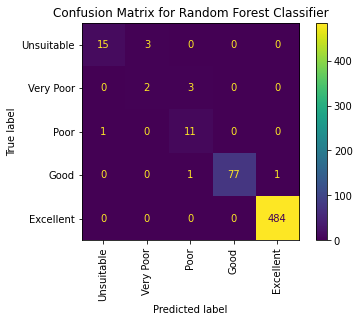

,Decision Tree,Random Forest
precision,0.994308,0.986082
recall,0.993311,0.984950
f1-score,0.993430,0.985197
accuracy,0.993311,0.984950


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7,"(0, 1, 2, 3, 4, 5, 6)","[0.9930191972076788, 0.9991273996509599, 0.998...",0.997382,"(0, 1, 2, 3, 4, 5, 6)",0.002837,0.002208,0.001104
6,"(0, 1, 2, 3, 4, 5)","[0.9965095986038395, 1.0, 0.9973821989528796, ...",0.998429,"(0, 1, 2, 3, 4, 5)",0.001648,0.001282,0.000641
5,"(1, 2, 3, 4, 5)","[0.9930191972076788, 1.0, 0.9991273996509599, ...",0.997731,"(1, 2, 3, 4, 5)",0.00314,0.002443,0.001222
4,"(1, 2, 3, 5)","[0.993891797556719, 0.9991273996509599, 0.9973...",0.997906,"(1, 2, 3, 5)",0.002802,0.00218,0.00109
3,"(1, 3, 5)","[0.993891797556719, 0.993891797556719, 0.99563...",0.995462,"(1, 3, 5)",0.001794,0.001396,0.000698
2,"(1, 3)","[0.8141361256544503, 0.8952879581151832, 0.904...",0.882723,"(1, 3)",0.044272,0.034446,0.017223
1,"(1,)","[0.5671902268760908, 0.6797556719022687, 0.663...",0.652007,"(1,)",0.055461,0.043151,0.021575


('0', '1', '2', '3', '4', '5')

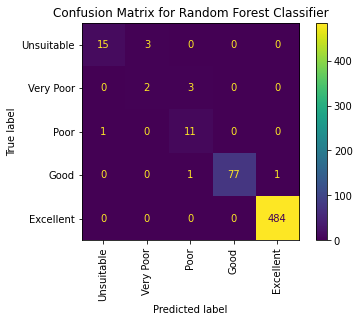

In [26]:
# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

#Wrapper Feature Selection
sfs_rf = SequentialFeatureSelector(rf_clf, forward=False, k_features="best")
sfs_rf.fit(X_train, y_train)
X_train_rf = sfs_rf.transform(X_train)
X_test_rf = sfs_rf.transform(X_test)

#Display Result
result(rf_clf, "Random Forest", X_train_rf, X_test_rf)

display(pd.DataFrame.from_dict(sfs_rf.get_metric_dict()).T)
display(sfs_rf.k_feature_names_)

,Decision Tree,Random Forest,SVM,Naive Bayes,CatBoost
precision,0.994308,0.986082,0.793549,0.971323,0.984618
recall,0.993311,0.984950,0.715719,0.934783,0.984950
f1-score,0.993430,0.985197,0.747184,0.951225,0.984713
accuracy,0.993311,0.984950,0.715719,0.934783,0.984950


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7,"(0, 1, 2, 3, 4, 5, 6)","[0.7146596858638743, 0.7504363001745201, 0.727...",0.730192,"(0, 1, 2, 3, 4, 5, 6)",0.018839,0.014658,0.007329
6,"(0, 1, 2, 3, 4, 5)","[0.7478184991273996, 0.7643979057591623, 0.737...",0.746771,"(0, 1, 2, 3, 4, 5)",0.015883,0.012358,0.006179
5,"(0, 1, 2, 3, 4)","[0.7495636998254799, 0.7696335078534031, 0.741...",0.752007,"(0, 1, 2, 3, 4)",0.017,0.013227,0.006613
4,"(0, 1, 3, 4)","[0.7530541012216405, 0.7678883071553229, 0.737...",0.751309,"(0, 1, 3, 4)",0.019798,0.015403,0.007702
3,"(1, 3, 4)","[0.7356020942408377, 0.7024432809773123, 0.739...",0.725654,"(1, 3, 4)",0.024352,0.018946,0.009473
2,"(1, 4)","[0.6701570680628273, 0.7041884816753927, 0.665...",0.67801,"(1, 4)",0.021362,0.016621,0.00831
1,"(1,)","[0.4912739965095986, 0.5174520069808028, 0.497...",0.505236,"(1,)",0.012347,0.009607,0.004803


('0', '1', '2', '3', '4')

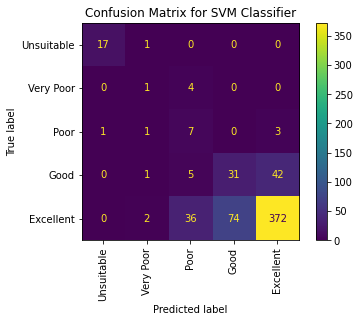

In [30]:
# Using Kernel SVM Classifier
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'rbf', random_state = 0)

#Wrapper Feature Selection
sfs_svm = SequentialFeatureSelector(svm_clf, forward=False, k_features="best")
sfs_svm.fit(X_train, y_train)
X_train_svm = sfs_svm.transform(X_train)
X_test_svm = sfs_svm.transform(X_test)

result(svm_clf, "SVM", X_train_svm, X_test_svm)

display(pd.DataFrame.from_dict(sfs_svm.get_metric_dict()).T)
display(sfs_svm.k_feature_names_)

,Decision Tree,Random Forest,Naive Bayes
precision,0.994308,0.986082,0.971323
recall,0.993311,0.984950,0.934783
f1-score,0.993430,0.985197,0.951225
accuracy,0.993311,0.984950,0.934783


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7,"(0, 1, 2, 3, 4, 5, 6)","[0.7460732984293194, 0.7207678883071553, 0.699...",0.715707,"(0, 1, 2, 3, 4, 5, 6)",0.021856,0.017005,0.008502
6,"(0, 1, 2, 3, 4, 5)","[0.819371727748691, 0.8350785340314136, 0.8176...",0.82356,"(0, 1, 2, 3, 4, 5)",0.012109,0.009421,0.00471
5,"(1, 2, 3, 4, 5)","[0.8219895287958116, 0.8420593368237347, 0.821...",0.827225,"(1, 2, 3, 4, 5)",0.012983,0.010101,0.005051
4,"(1, 3, 4, 5)","[0.8254799301919721, 0.8307155322862129, 0.822...",0.826527,"(1, 3, 4, 5)",0.009448,0.007351,0.003675
3,"(1, 3, 5)","[0.8010471204188482, 0.824607329842932, 0.8045...",0.811693,"(1, 3, 5)",0.011468,0.008923,0.004461
2,"(1, 5)","[0.68760907504363, 0.6492146596858639, 0.66143...",0.664223,"(1, 5)",0.020205,0.01572,0.00786
1,"(1,)","[0.5157068062827225, 0.537521815008726, 0.5122...",0.525131,"(1,)",0.012355,0.009613,0.004806


('1', '2', '3', '4', '5')

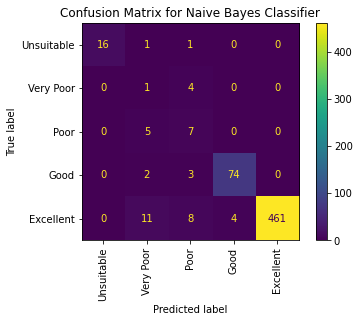

,Decision Tree,Random Forest,SVM,Naive Bayes
precision,0.994308,0.986082,0.793549,0.971323
recall,0.993311,0.984950,0.715719,0.934783
f1-score,0.993430,0.985197,0.747184,0.951225
accuracy,0.993311,0.984950,0.715719,0.934783


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7,"(0, 1, 2, 3, 4, 5, 6)","[0.7460732984293194, 0.7207678883071553, 0.699...",0.715707,"(0, 1, 2, 3, 4, 5, 6)",0.021856,0.017005,0.008502
6,"(0, 1, 2, 3, 4, 5)","[0.819371727748691, 0.8350785340314136, 0.8176...",0.82356,"(0, 1, 2, 3, 4, 5)",0.012109,0.009421,0.00471
5,"(1, 2, 3, 4, 5)","[0.8219895287958116, 0.8420593368237347, 0.821...",0.827225,"(1, 2, 3, 4, 5)",0.012983,0.010101,0.005051
4,"(1, 3, 4, 5)","[0.8254799301919721, 0.8307155322862129, 0.822...",0.826527,"(1, 3, 4, 5)",0.009448,0.007351,0.003675
3,"(1, 3, 5)","[0.8010471204188482, 0.824607329842932, 0.8045...",0.811693,"(1, 3, 5)",0.011468,0.008923,0.004461
2,"(1, 5)","[0.68760907504363, 0.6492146596858639, 0.66143...",0.664223,"(1, 5)",0.020205,0.01572,0.00786
1,"(1,)","[0.5157068062827225, 0.537521815008726, 0.5122...",0.525131,"(1,)",0.012355,0.009613,0.004806


('1', '2', '3', '4', '5')

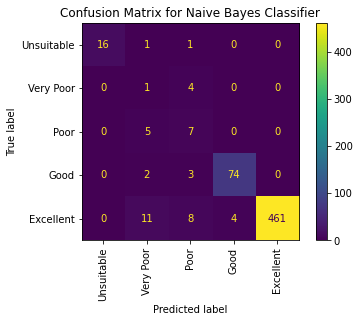

In [28]:
# Using Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()

#Wrapper Feature Selection
sfs_nb = SequentialFeatureSelector(nb_clf, forward=False, k_features="best")
sfs_nb.fit(X_train, y_train)
X_train_nb = sfs_nb.transform(X_train)
X_test_nb = sfs_nb.transform(X_test)

result(nb_clf, "Naive Bayes", X_train_nb, X_test_nb)

display(pd.DataFrame.from_dict(sfs_nb.get_metric_dict()).T)
display(sfs_nb.k_feature_names_)

,Decision Tree,Random Forest,SVM,Naive Bayes,CatBoost
precision,0.994308,0.986082,0.793549,0.971323,0.984618
recall,0.993311,0.984950,0.715719,0.934783,0.984950
f1-score,0.993430,0.985197,0.747184,0.951225,0.984713
accuracy,0.993311,0.984950,0.715719,0.934783,0.984950


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7,"(0, 1, 2, 3, 4, 5, 6)","[0.7460732984293194, 0.7207678883071553, 0.699...",0.715707,"(0, 1, 2, 3, 4, 5, 6)",0.021856,0.017005,0.008502
6,"(0, 1, 2, 3, 4, 5)","[0.819371727748691, 0.8350785340314136, 0.8176...",0.82356,"(0, 1, 2, 3, 4, 5)",0.012109,0.009421,0.00471
5,"(1, 2, 3, 4, 5)","[0.8219895287958116, 0.8420593368237347, 0.821...",0.827225,"(1, 2, 3, 4, 5)",0.012983,0.010101,0.005051
4,"(1, 3, 4, 5)","[0.8254799301919721, 0.8307155322862129, 0.822...",0.826527,"(1, 3, 4, 5)",0.009448,0.007351,0.003675
3,"(1, 3, 5)","[0.8010471204188482, 0.824607329842932, 0.8045...",0.811693,"(1, 3, 5)",0.011468,0.008923,0.004461
2,"(1, 5)","[0.68760907504363, 0.6492146596858639, 0.66143...",0.664223,"(1, 5)",0.020205,0.01572,0.00786
1,"(1,)","[0.5157068062827225, 0.537521815008726, 0.5122...",0.525131,"(1,)",0.012355,0.009613,0.004806


('1', '2', '3', '4', '5')

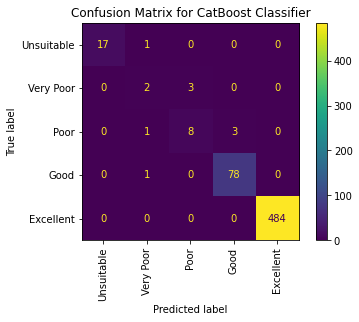

In [29]:
# Using CatBoost Classifier
from catboost import CatBoostClassifier
cb_clf = CatBoostClassifier(random_seed=42, logging_level='Silent')

#Wrapper Feature Selection
sfs_cb = SequentialFeatureSelector(cb_clf, forward=False, k_features="best")
sfs_cb.fit(X_train, y_train)
X_train_cb = sfs_cb.transform(X_train)
X_test_cb = sfs_cb.transform(X_test)

result(cb_clf, "CatBoost", X_train_cb, X_test_cb)

display(pd.DataFrame.from_dict(sfs_nb.get_metric_dict()).T)
display(sfs_nb.k_feature_names_)